In [1]:
import pandas as pd

In [2]:
x = pd.read_csv('X_train.csv')
x = x.drop(['Código NIF'],axis=1)
x.head()

,Sociedad limitada,Sociedad anonima,Otras formas juridicas,C,G,F,M,I,Otras actividades,Ingresos de explotación EUR Últ. año disp.,...,Acreedores a largo plazo % Año - 2,Fondo maniobra % Últ. año disp.,Fondo maniobra % Año - 1,Fondo maniobra % Año - 2,Necesidad fondo maniobra % Últ. año disp.,Necesidad fondo maniobra % Año - 1,Necesidad fondo maniobra % Año - 2,Tesorería % Últ. año disp.,Tesorería % Año - 1,Tesorería % Año - 2
0,1,0,0,0,0,0,0,0,1,34800.0,...,-80.02,-84.42,-71.800000,4084.160000,-0.86,-0.78,-7.94,-89.270000,210.30,646.65
1,1,0,0,0,0,0,0,0,1,526437.0,...,13.02,-14.06,21.830000,-16.520000,-0.41,0.31,0.04,-91.650000,-65.58,-9.93
2,1,0,0,0,0,0,0,0,1,806691.0,...,-2.29,24.66,-7.250000,10.410000,2.89,-0.43,1.42,-46.440000,106.31,-46.84
3,1,0,0,1,0,0,0,0,0,3111634.0,...,-26.65,64.03,78.056073,93.801558,-1.18,-0.74,-2.56,-31.370000,-25.07,136.84
4,0,1,0,0,0,0,0,0,1,146190.0,...,-3.87,-14.74,11.820000,4.270000,-42.46,-0.97,-0.70,9272.192143,-100.00,-83.97


In [3]:
y = pd.read_csv('Y_train.csv')

y[y['Estado'] == 'Activa'] = 1
y[y['Estado'] == 'Concurso'] = 0
y = y['Estado'].astype(int)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

tr = DecisionTreeClassifier(max_depth=3)

cross_val_score(tr,x,y,cv=10,scoring='f1')

array([0.95076622, 0.95952223, 0.95796094, 0.9566075 , 0.95896757,
       0.96467481, 0.96119403, 0.95823742, 0.96069287, 0.95692512])

In [13]:
from sklearn.metrics import accuracy_score

tr.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
import graphviz 
from sklearn import tree
from IPython.display import Image  
def imprimeArbol(model, X_train, y_train, width):
    fnames = X_train.columns.values
    lnames = [str(x) for x in y_train.unique()]
    dot_data = tree.export_graphviz(model, out_file=None, 
                             feature_names=fnames,  
                             class_names=lnames,  
                             filled=True, rounded=True,  
                             special_characters=True,
                             )  
    graph = graphviz.Source(dot_data)  
    return graph


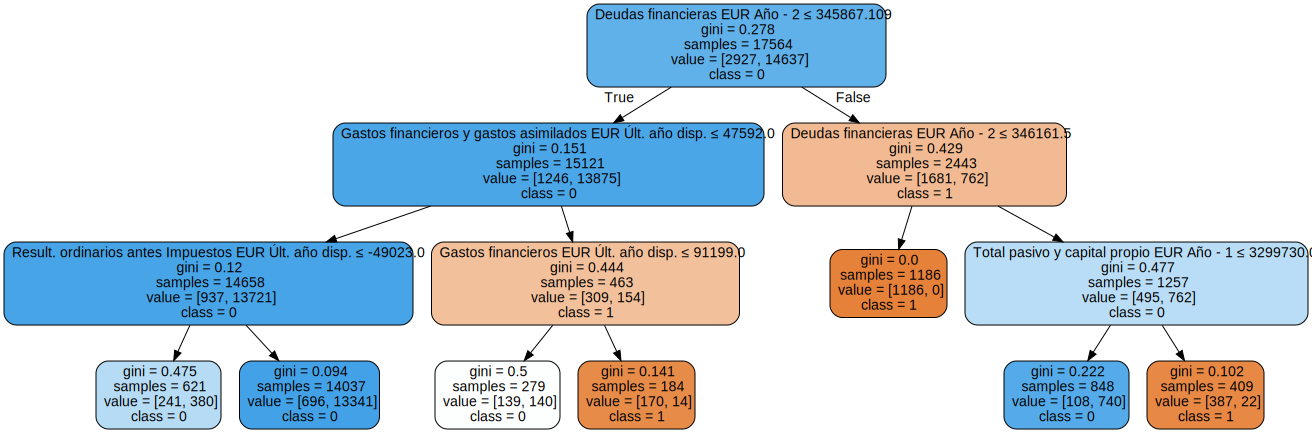

In [14]:
imprimeArbol(tr,x,y,'200px')